<a href="https://colab.research.google.com/github/faranbutt/GAN-Learning/blob/main/Autoencoder_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Conv2DTranspose,Reshape, InputLayer, Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
def preprocess(imgs):
  imgs = imgs.astype('float32')/255.0
  imgs = np.pad(imgs,((0,0),(2,2),(2,2)))
  imgs = np.expand_dims(imgs,-1)
  return imgs

In [ ]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [ ]:
x_train.shape,x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

In [ ]:
encoder = Sequential([
    InputLayer(input_shape = (32,32,1),name='encoder_input'),
    Conv2D(32,(3,3),strides=2,activation='relu',padding='same'),
    Conv2D(64,(3,3),strides=2,activation='relu',padding='same'),
    Conv2D(128,(3,3),strides=2,activation='relu',padding='same'),
    Flatten(),
    Dense(2,name='encoder_ouput')

],name="Encoder")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
encoder.summary()

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_ouput (Dense)           │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder = Sequential([
    InputLayer(shape=(2,),name='decoder_input'),
    Dense(4*4*128),
    Reshape((4,4,128)),
    Conv2DTranspose(128,(3,3),padding='same',strides = 2, activation='relu'),
    Conv2DTranspose(64,(3,3),padding='same',strides = 2, activation='relu'),
    Conv2DTranspose(32,(3,3),padding='same',strides = 2, activation='relu'),
    Conv2D(1,(3,3),strides=1,padding='same',activation='sigmoid',name='decoder_output'),
],name="Decoder")
decoder.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 2048)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 8, 8, 128)      │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 16, 16, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Conv2D)         │ (None, 32, 32, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder = Sequential([encoder,decoder],name='Autoencoder')
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.summary()

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Encoder (Sequential)            │ (None, 2)              │        96,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Sequential)            │ (None, 32, 32, 1)      │       246,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343,043 (1.31 MB)

 Trainable params: 343,043 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(
    x_train,
    x_train,
    epochs = 5,
    batch_size=100,
    shuffle=True,
    validation_data=(x_test,x_test)
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 139s 229ms/step - loss: 0.3575 - val_loss: 0.2656
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 142s 229ms/step - loss: 0.2607 - val_loss: 0.2591
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 138s 223ms/step - loss: 0.2555 - val_loss: 0.2569
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 144s 227ms/step - loss: 0.2538 - val_loss: 0.2540
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - loss: 0.2522 - val_loss: 0.2532


In [45]:
predicted_images = autoencoder.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


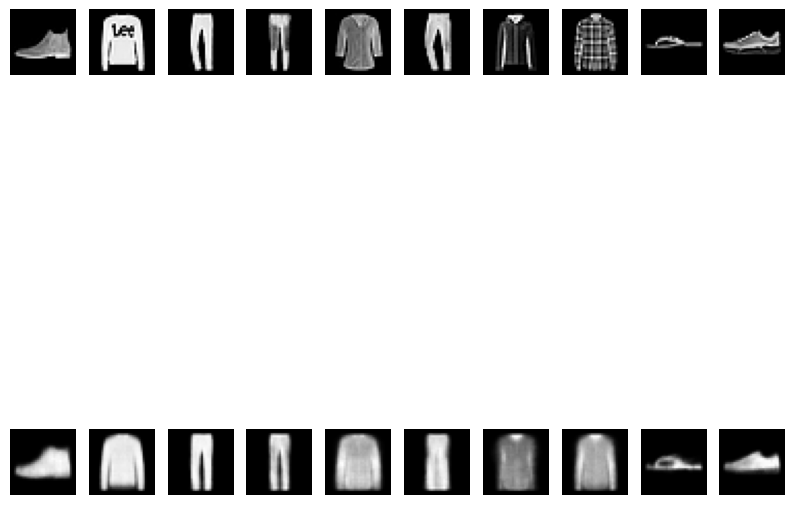

In [49]:
plt.figure(figsize=(10,10))
for i in range(10):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(x_test[i].reshape(32, 32), cmap="gray")
  plt.axis("off")

  ax = plt.subplot(2, 10, i + 1 + 10)
  plt.imshow(predicted_images[i].reshape(32, 32), cmap="gray")
  plt.axis("off")

plt.show()

In [59]:
x_test_subset = x_test[:1000]
y_test_subset = y_test[:1000]

In [60]:
embeddings = encoder.predict(x_test_subset)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


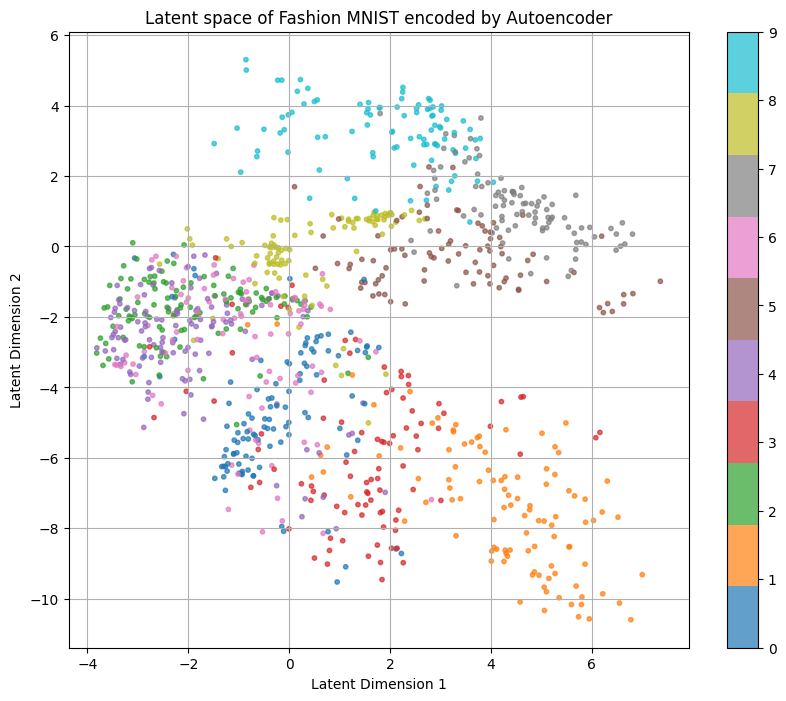

In [61]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_test_subset, cmap="tab10", s=10, alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("Latent space of Fashion MNIST encoded by Autoencoder")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True)
plt.show()

In [68]:
embeddings[:3,:]

array([[  3.2828765,   2.002087 ],
       [ -3.2306378,  -1.780148 ],
       [  5.0608625, -10.33073  ]], dtype=float32)

In [73]:
mins,maxs = np.min(embeddings,axis=0),np.max(embeddings,axis=0)

In [75]:
sample_data = np.random.uniform(mins,maxs,size=(18,2))

In [76]:
reconstructions = decoder.predict(sample_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


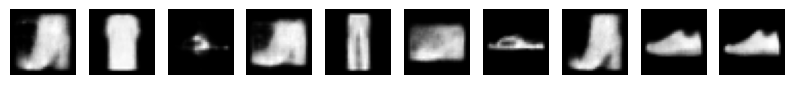

In [77]:
plt.figure(figsize=(10,10))
for i in range(10):
  ax = plt.subplot(2, 10, i + 1 + 10)
  plt.imshow(reconstructions[i].reshape(32, 32), cmap="gray")
  plt.axis("off")

plt.show()